# Algorithm Analysis

## What is an algorithm?

  > A well-defined sequence of steps, explained clearly enough that even a computer could do them
  >
  > PerlDoc

  >  A set of rules for solving a problem in a finite number of steps, as for finding the greatest common divisor
  >   
  > Dictionary.com

  > An unambiguous specification of how to solve a class of problems
  > 
  > Wikipedia

### Side note: Why is an algorithm actually called algorithm?

Because of Muḥammad ibn Mūsā al-Khwārizmī (Persian: Muḥammad Khwārizmī محمد بن موسى خوارزمی), Arabized as al-Khwarizmi with al- and formerly Latinized as Algorithmi... read more about him [for example here](https://en.wikipedia.org/wiki/Muhammad_ibn_Musa_al-Khwarizmi). 

### Side note: What is the difference between a program and an algorithm?

  > A program is a detailed set of instructions for a computer to carryout, while an algorithm is a detailed sequence of steps for carrying out a process.
  >
  > [David Navarro](https://www.quora.com/What-is-the-difference-between-algorithms-and-programs)
  
  
  > A program is an encoded version of an algorithm.
  >
  > Helge :)

## Objectives

- To understand why algorithm analysis is important.
- To be able to use "Big-O" to describe execution time.
- To understand the "Big-O" execution time of common operations on Python lists and dictionaries.
- To understand how the implementation of Python data impacts algorithm analysis.
- To understand how to benchmark simple Python programs.

## Running a program

Python programs takes time and resources to run. Today we will learn how to measure the time and examine the resources.

## Timing your programs

* Python has a `timeit` module that you can use to time your script
  * Type the following into My:
  
```python
from timeit import default_timer

    
start = default_timer()
print('hi')
end = default_timer()

print(end - start)
```

## Exercise!

* Write a small Python script that prints something like 'I have a dream' 100 times
  * How long time does that take to execute?
  * What about if you run it 10'000 times?

* Measure the time it takes to run the following code:
  * ```python
range(0, 1000000000)        # 9 0's
```
  * ```python
for x in range(1000000000): # 9 0's
        x + 1
```
    * PS: Can you do this with a list-comprehension?
  * What is the difference?

## General Scope

- In general, we are interested in *the performance* of the programs that we write
  - That is, how many seconds/minutes/hours/days is the code going to run?

# Why does all this matter?

Because we do not have really powerful machines.

Consider the simple task of sorting all the words in the book "The Adventures Of Sherlock Holmes" alphabetically...


In [1]:
from sorting_experiment import prepare_data
from sort_algos import sort_algo_a, sort_algo_b


words = prepare_data('the_adventures_of_sherlock_holmes.txt')
print(f'The book contains {len(words)} words')

The book contains 104488 words


## Lecture shorthand for 'take time'

We'll use something called `%time` to record the time. 

It is equivalent to the timing code above, just shorter.

In [12]:
%time print('hi')

hi
CPU times: user 56 µs, sys: 0 ns, total: 56 µs
Wall time: 47.7 µs


In [21]:
%time sort_algo_a(words) 

CPU times: user 402 ms, sys: 0 ns, total: 402 ms
Wall time: 402 ms


In [ ]:
%time sort_algo_b(words)

# Finding the smallest number

- Let's solve the following problem:
  - Input: Given a list of numbers, find the smallest element. 
  - That is, write a function `find_minimum(data_list)` with the following behavior:
  ```python
     >>> find_minimum([3, 1, 5])
     1
     >>> find_minimum([3, 9, 0])
     0
 ```

## Two possible solutions

### Solution 1

* Store the first element of the list in a temporary `smallest` variable
* Compare each element in the list:
  * to each other element in the list:
    * If the other element is smaller than the current `smallest`, then assign the other element to the current `smallest` variable

In [22]:
def find_minimum_1(data_list):
    smallest = data_list[0]
    for element in data_list:
        for other in data_list:
            if other < smallest:
                smallest = other
    return smallest

## Solution 2

1. Store the first element in the list in a temporary `smallest` variable
2. For each element in the list:
    * Compare the current element to the `smallest`
    * If the current element is smaller, store it in the `smallest` variable

In [23]:
def find_minimum_2(data_list):
    smallest = data_list[0]
    for element in data_list:
        if element < smallest:
            smallest = element
    return smallest

In [24]:
%time find_minimum_1(list(range(10000)))

CPU times: user 1.74 s, sys: 0 ns, total: 1.74 s
Wall time: 1.74 s


0

In [33]:
%time find_minimum_2(list(range(10000)))

CPU times: user 1.65 ms, sys: 0 ns, total: 1.65 ms
Wall time: 1.55 ms


0

In [26]:
%time find_minimum_1(list(reversed(range(10000))))

CPU times: user 1.98 s, sys: 0 ns, total: 1.98 s
Wall time: 1.99 s


0

In [35]:
%time find_minimum_2(list(reversed(range(10000))))

CPU times: user 2.85 ms, sys: 0 ns, total: 2.85 ms
Wall time: 2.14 ms


0

We can **feel** the difference between these two methods. (Although they result in the same result.) 

But how can we make the difference precise?

## General Scope

- In general, we are interested in *the performance* of the programs that we write
  - That is, how many seconds/minutes/hours/days is the code going to run?


- This is very dependent on the computer we run the program on
  - Can we find something more independent of the actual computer?

All our runs operate on lists that have size `n = 10000`.

**More interesting:** How does the behavior change if we increase the input size, let's say comparing `n = 1000` with `n = 10000`. 

In [36]:
%time find_minimum_1(list(reversed(range(1000))))

CPU times: user 38 ms, sys: 0 ns, total: 38 ms
Wall time: 37 ms


0

In [40]:
%time find_minimum_1(list(reversed(range(100000))))

CPU times: user 3min 19s, sys: 0 ns, total: 3min 19s
Wall time: 3min 19s


0

In [42]:
%time find_minimum_2(list(reversed(range(1000))))

CPU times: user 61 µs, sys: 0 ns, total: 61 µs
Wall time: 63.7 µs


0

In [57]:
%time find_minimum_2(list(reversed(range(100000))))

CPU times: user 8.51 ms, sys: 1e+03 ns, total: 8.51 ms
Wall time: 8.16 ms


0

We note that the running time of `find_minimum_1` increased by a factor of roughly `100` when the input is `10` times larger.

`find_minimum_2`'s running time increased by a factor of roughly `10` when the input is `10` times larger.

We can make it more precise: If the input consists of `n` elements, then
- `find_minimum_1` compares each element to all `n` elements in the list. 
  - In the **worst case**, it makes $n \cdot n = n^2$ comparisons. We say $T_1(n) = n^2$. 
- `find_minimum_2` compares each element exactly once to `minimum`. It makes $T_2(n) = n$ comparisons.

Of course, the program not only does comparisons, but the number of comparisons roughly describes the running time. 


## Visual interpretation

![](images/dots.jpeg)

* $n = \text{single row}$
* $n * n = \text{full square}$

## Worst-case running time
$T(n)$ is a bound on the **worst-case running time** of an input of size $n$, i.e., the running time on the input of size $n$ where our program does the most work. 

If the $i$-th element is the minimum element, then `find_minimum_1` makes $i \cdot n$ comparisons. In the **best case**, it only makes $n$ comparisons as well. 

- The **order of magnitude function** describes the part of $T(n)$ that increases the fastest as the value of $n$ increases. 

- Order of magnitude is often called Big-O notation (for “order”) and written as O(f(n)). 

- It provides a useful approximation to the actual number of steps in the computation. The function $f(n)$ provides a simple representation of the dominant part of the original $T(n)$.

## Example with numbers
As another example, suppose that for some algorithm, the exact number of steps is 
 
<center>$T(n)=5n^2+27n+1005$</center>
    
When $n$ is small, say 1 or 2, the constant 1005 seems to be the dominant part of the function. However, as $n$ gets larger, the $n^2$ term becomes the most important. 

In fact, when n is really large, the other two terms become insignificant in the role that they play in determining the final result. 

Again, to approximate $T(n)$ as $n$ gets large, we can ignore the other terms and focus on $5n^2$. In addition, the coefficient 5 becomes insignificant as n gets large. We would say then that the function $T(n)$ has an order of magnitude $f(n)=n^2$, or simply that it is $O(n^2)$.

## Some math


### Linear ($n$)
```python
for x in range(0, n):
    do_operation()
```

### Quadratic ($n^2$)
```python
for x in range(0, n):
    for y in range(0, n):
        do_operation()
```

### Cubic ($n^3$)
```python
for x in range(0, n):
    for y in range(0, n):
        for z in range(0, n):
            do_operation()
```

### Logarithmic ($log\ n$)

* Normally refers to $log_2$
* Halves $n$ in every step
* Example: $n = 10$

 * Step 1: $n = 5$

* Step 2: $n = 2$

* Step 3: $n = 1$

In [ ]:
import math


math.log(10, 2)

### Exponential ($2^n$)

* Very big very quick

* $n = 10$ would run in $2^{10}$

In [ ]:
2 ** 10

* $n = 100$ would run in $n^{100}$

In [ ]:
2 ** 100


![](images/bigo.png)

In the above visualization we can see the following worst-case runtime classes.

  * $O(1)$ ("constant running time")
  * $O(log_2 n)$ ("logarithmic running time")
  * $O(n)$ ("linear running time")
  * $O(n log_2 n)$ ("log-linear running time")
  * $O(n^2)$ ("quadratic runnning time")
  * $O(n^3)$ ("cubic running time")
  * $O(2^n)$ ("exponential running time")

Let's say one elementary operation takes 10 nanoseconds, then we get

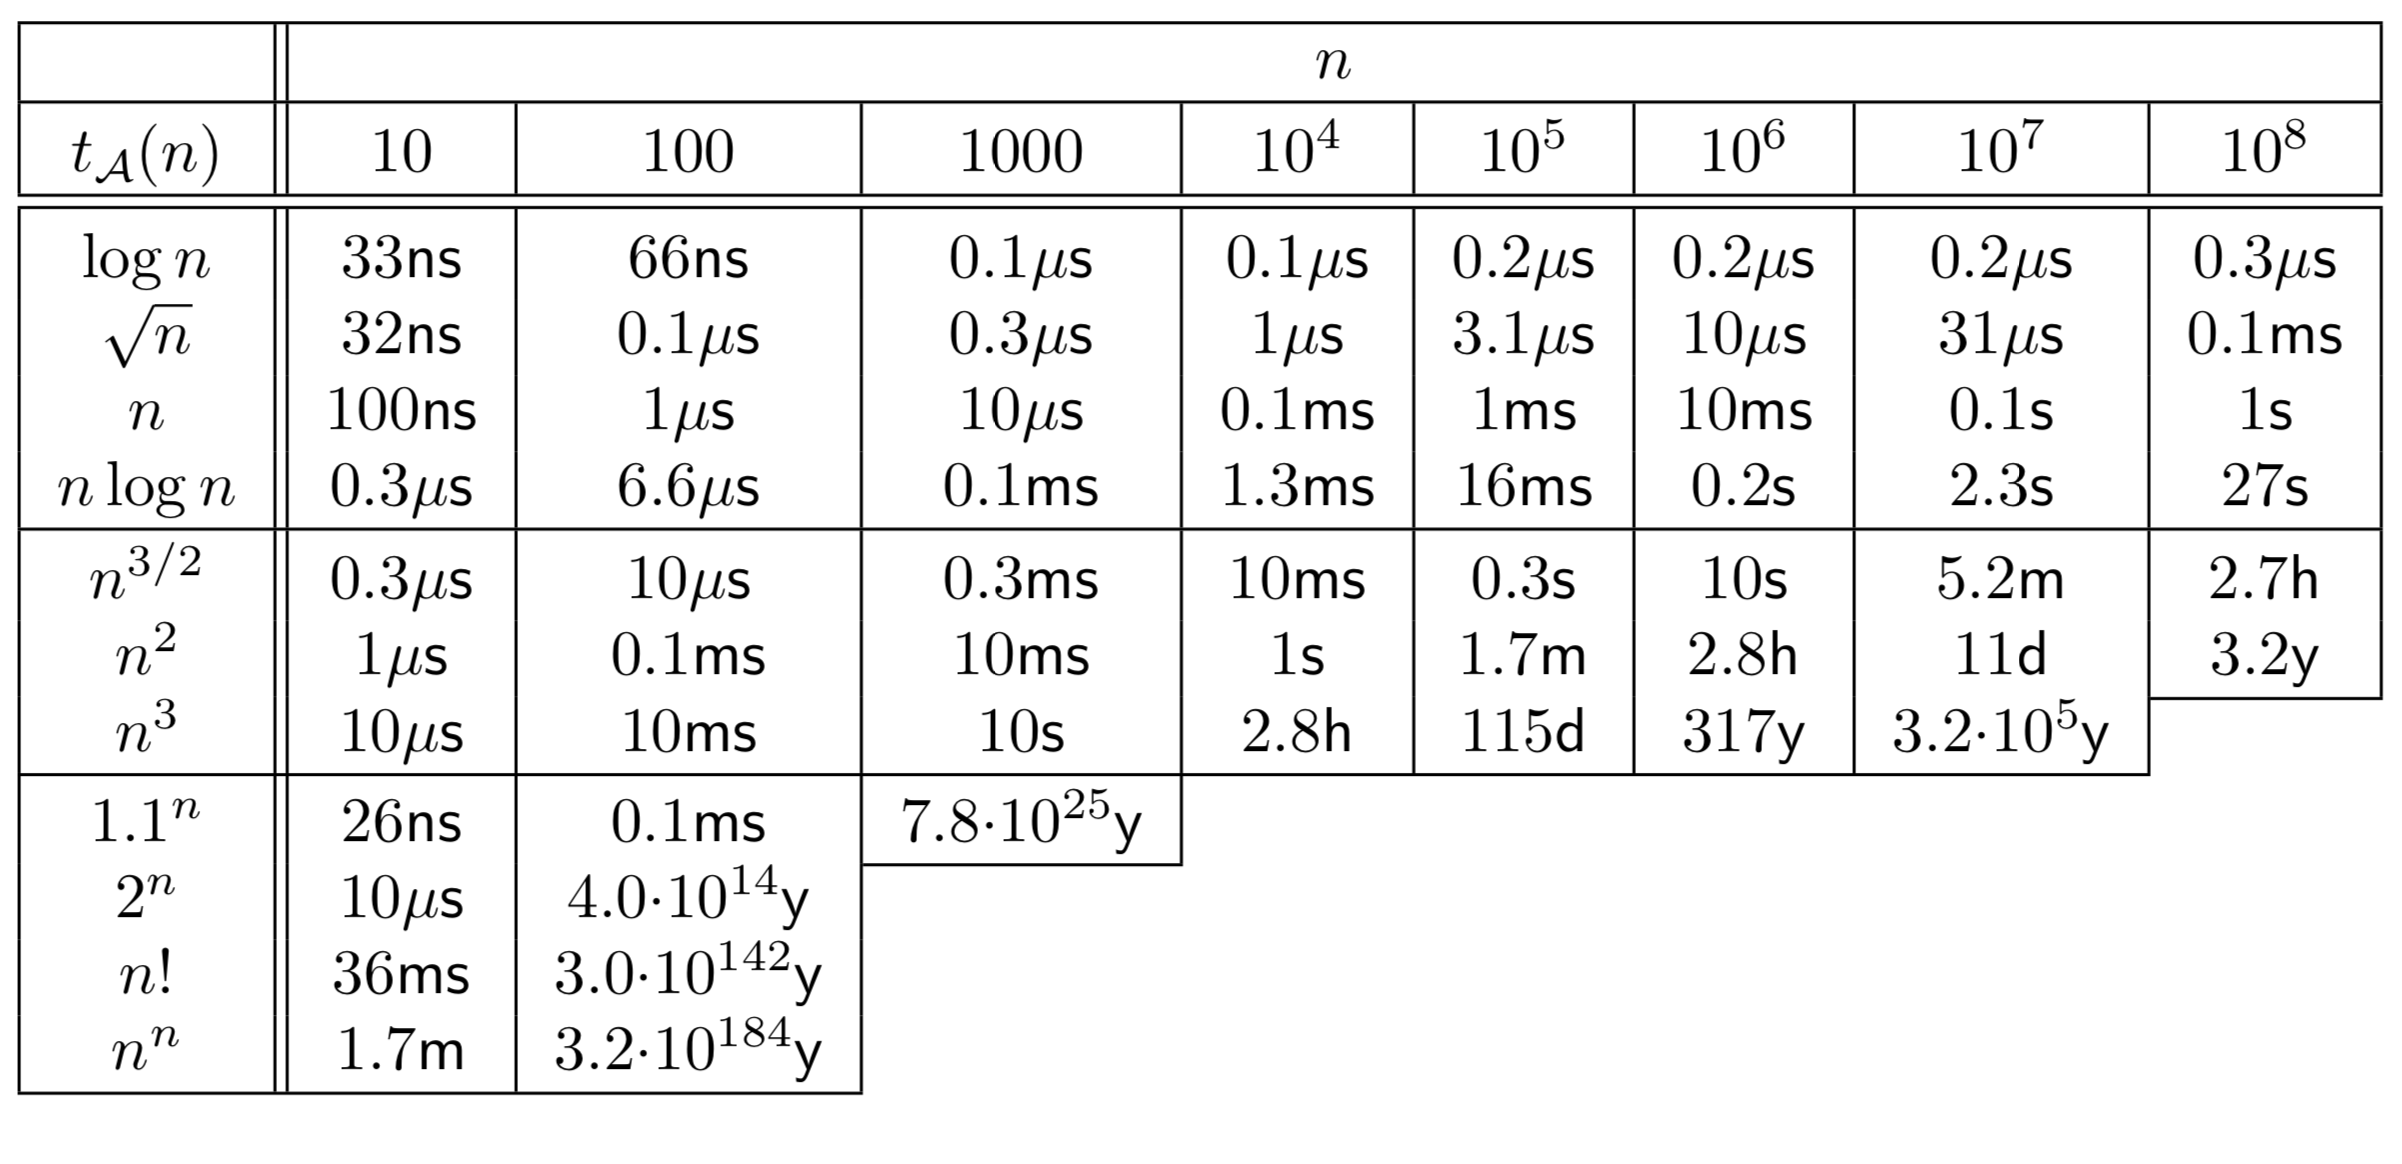

## Next

Sorting Algorithms

### References

Main source for this chapter is http://interactivepython.org/runestone/static/pythonds/AlgorithmAnalysis/toctree.html.